# WhatsApp Chat Group Analyzer

In [2]:
import re
import pandas as pd
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns

In [3]:
def extract_date(s):
    
    '''Function to extract the date of a whatsapp message in a whatsapp group.'''
    
    pattern = "(\d{1,2})\/(\d{1,2})\/(\d{1,2})"
    x = re.findall(pattern,line)
#     if not x:
#         return False
    day = int(x[0][1])
    month = int(x[0][0])
    year = int('20'+ x[0][2])
    date = datetime(year,month,day).date()
    
    return date

In [4]:
def extract_hour(s):
    
    '''Function to extract the hour of the day of a whatsapp message in a whatsapp group.'''
    
    pattern = "(\d{1,2}):(\d{1,2}):(\d{1,2})\s([AP]M)"
    x = re.findall(pattern,line)
#     if not x:
#         return False
    if x[0][3]=='PM' and x[0][0]!='12':
        hour = int(x[0][0])+ 12
    else:
        hour = int(x[0][0])
    return hour

In [5]:
def extract_name(s):
    
    '''Function to extract the messanger name of a whatsapp message in a whatsapp group.'''
    
    pattern = "[AP]M\]\s(.*?):"
    x = re.findall(pattern,line)
    if not x:
        return 'Not a chat'
    if not x[0][0].isalpha():
        return 'Unknown'
    return x[0]

In [6]:
def extract_msg(s):
    
    '''Function to extract a whatsapp message in a whatsapp group.'''
    
    pattern = "([a-zA-Z].*?):(.*)"
    x=[]
    x = re.findall(pattern,line)
    if not x:
        return 'Not a chat'
    return x[0][1].lower()

In [8]:

file = open('_chat.txt','r', encoding='utf-8')  #reading the text while which can be exported from a whatsapp group
lines = file.readlines()
data = {'date':[], 'hour': [], 'user':[], 'message':[]}
msg = ''
counter = -1

#extracting data from a whatsapp group into  structured form. Here, I have used a dictionary.

for line in lines:

    if line[0] != '[':

        data['message'][counter]= data['message'][counter]+ ' ' + msg.join(line.rstrip('\n'))
        continue
    counter+=1
    data['date'].append(extract_date(line))
    data['hour'].append(extract_hour(line))
    data['user'].append(extract_name(line))
    data['message'].append(extract_msg(line))




In [9]:
# Checking the length of lists in the dictionary to detect any misfits
for i in data:
    print(len(data[i]))
    

1192
1192
1192
1192


In [10]:
#storing the data in a pandas data frame
df = pd.DataFrame(data)
df.head(10)

,date,hour,user,message
0,2020-05-12,14,Launch Cricket,‎messages to this group are now secured with ...
1,2020-05-12,14,Not a chat,Not a chat
2,2020-05-13,14,Not a chat,Not a chat
3,2020-05-13,14,Not a chat,Not a chat
4,2020-05-13,14,Robin,added titu
5,2020-05-13,14,Robin,and sabko group admin bana diya hai
6,2020-05-13,14,Shivendra Purdue,are we playing today??
7,2020-05-13,14,Jeffrey,i won't be available today guys
8,2020-05-13,14,Shivendra Purdue,"if we have 6 or more, then we can think of pl..."
9,2020-05-13,14,Shivendra Purdue,*6 or more players


In [11]:
#concatinating the entire message into a single string to be processed into a wordcloud
content = ''
for i in data['message']:
    
    content += i + ' '
    

In [22]:
#defining a mask for the wordcloud
mask = np.array(Image.open("bat2.jpg"))

#creating a list of stopwords to be ignored while creating a wordcloud
stop = list(STOPWORDS)
stop.remove('out')
stop.remove('in')
stop.append('hai')

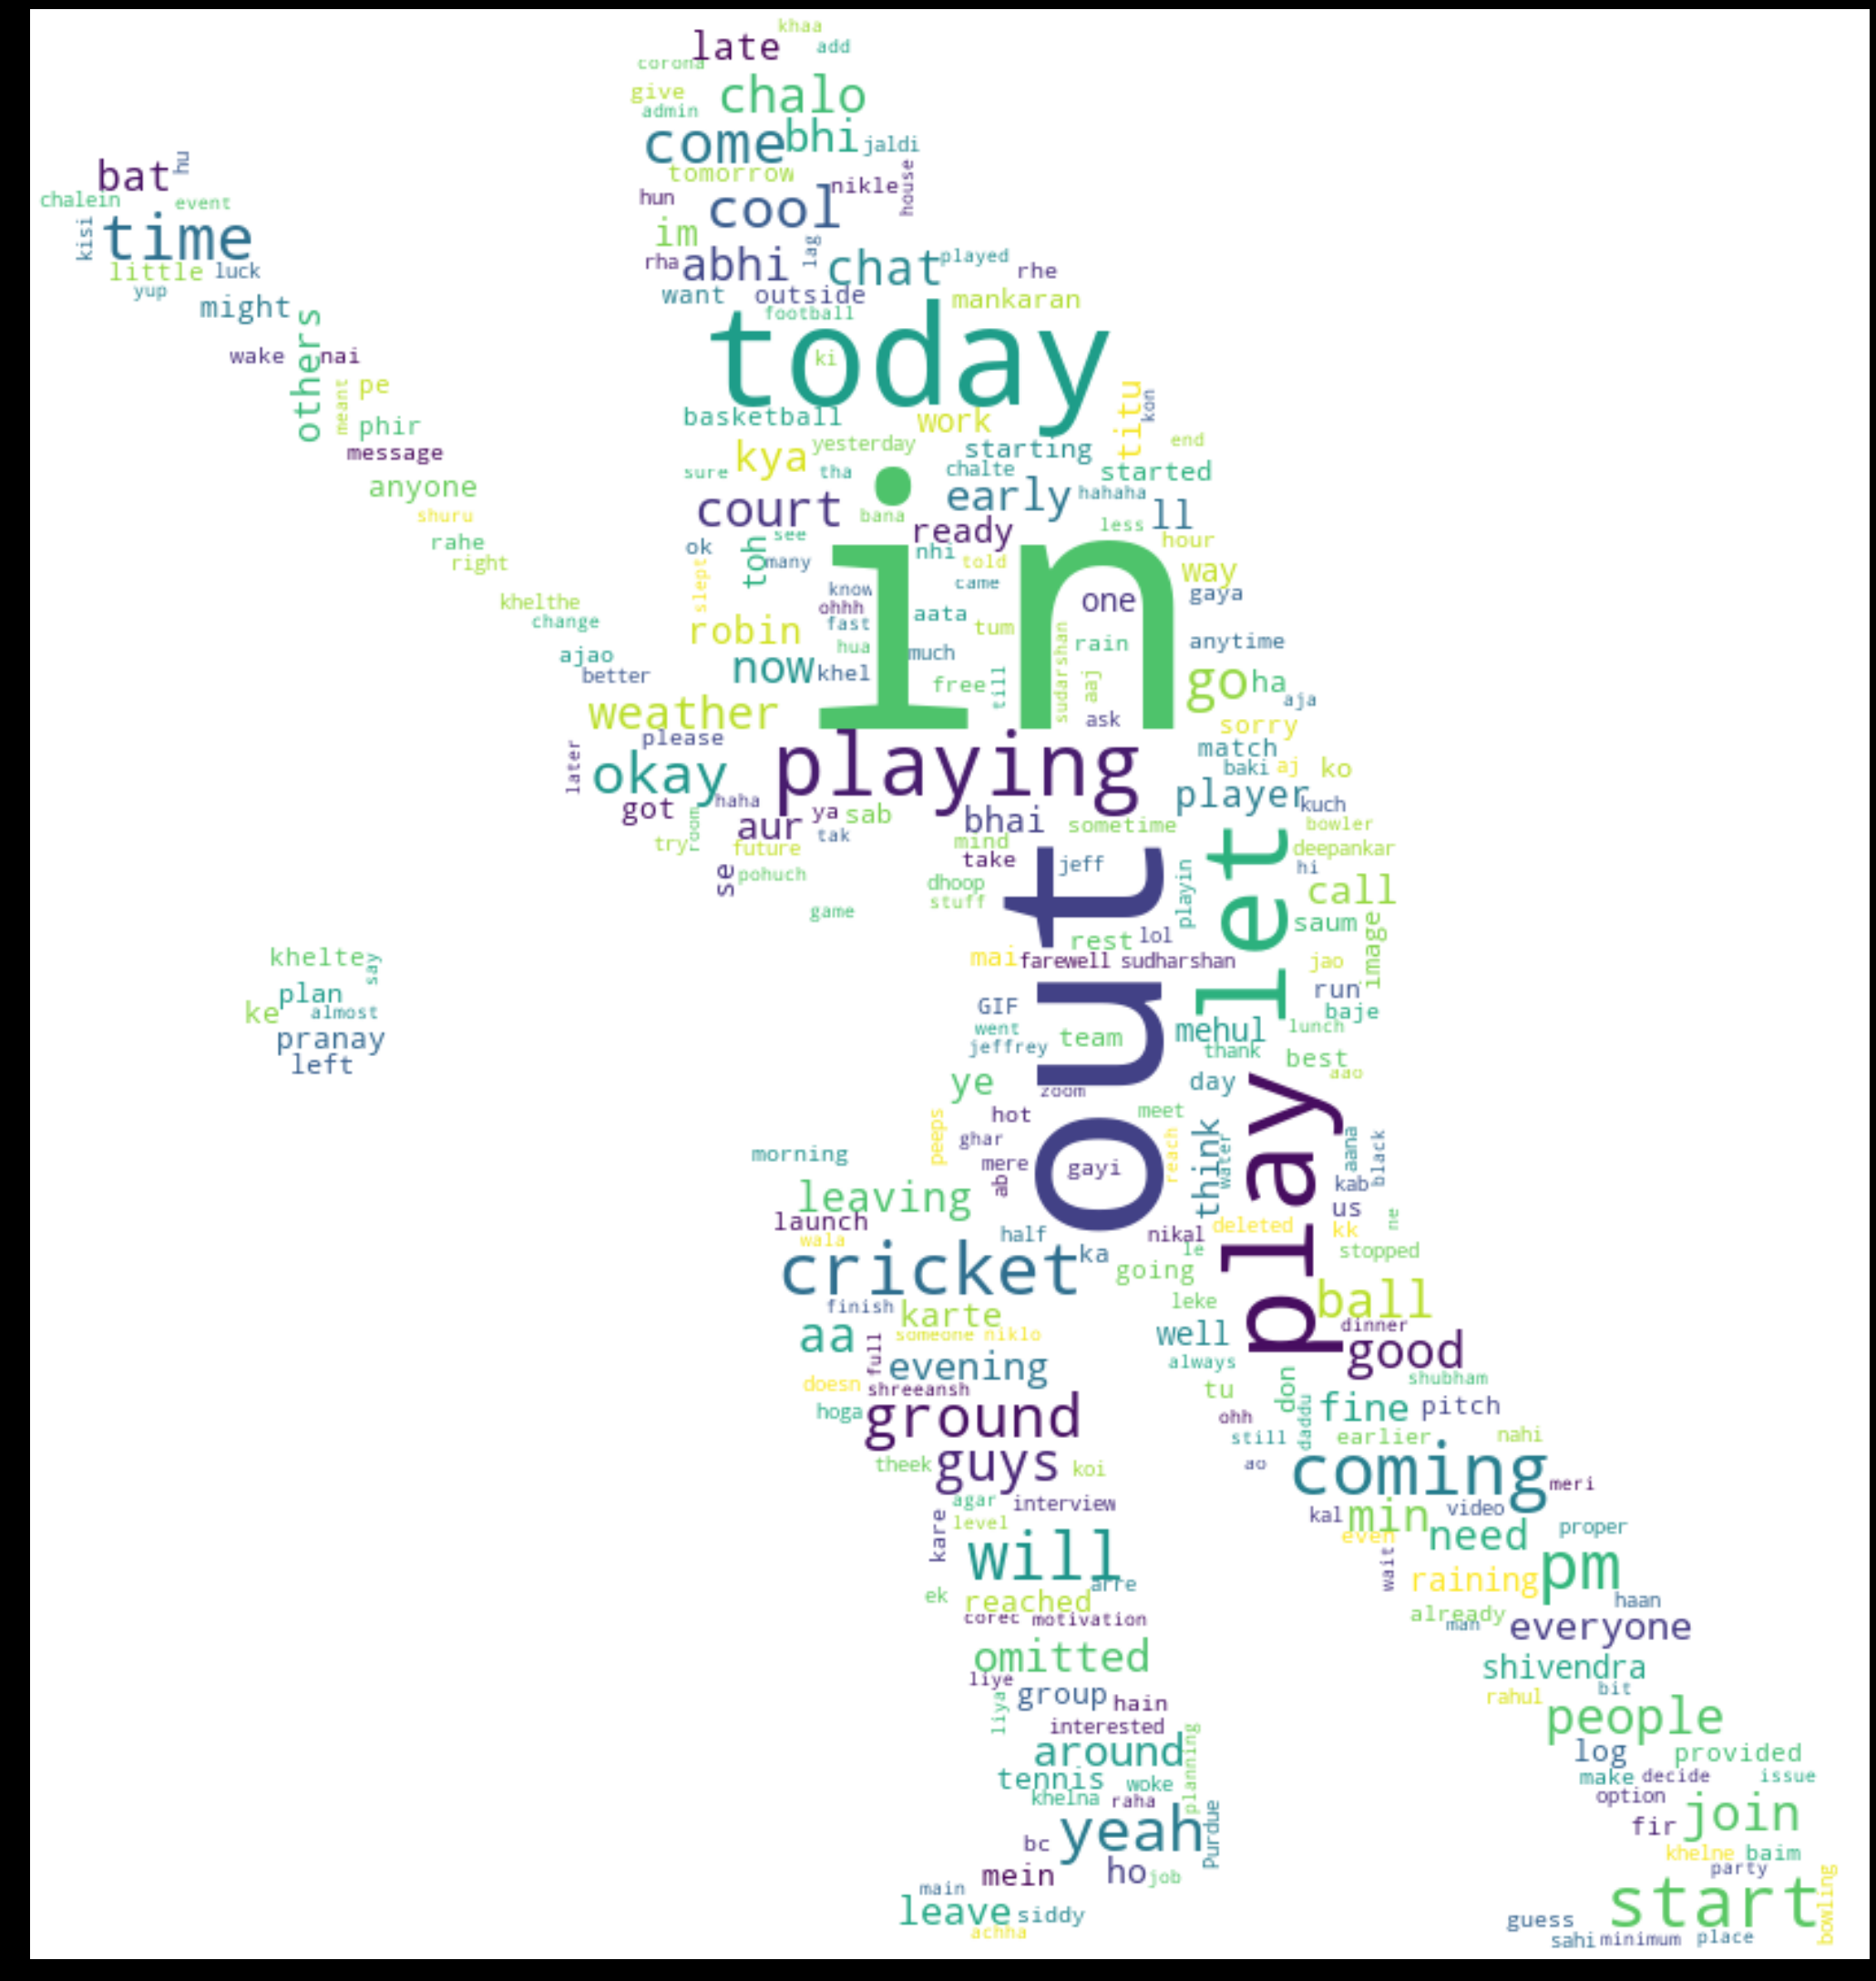

In [25]:
#generating a wordcloud and saving it as an image file

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop, max_words=300, mask=mask, collocations=False).generate(content)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file('Cricket.jpg')

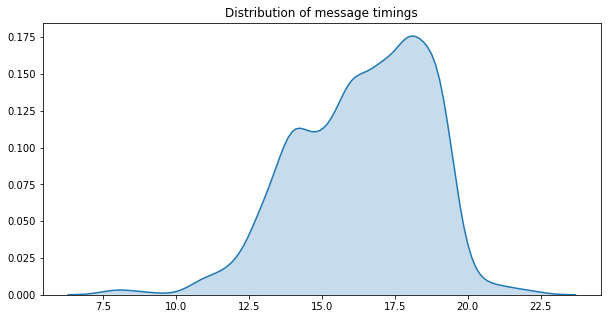

In [61]:
# creating a seaborn plot to check at which hours of the day, the group is most active
plt.figure(figsize=(10,5))
sns.kdeplot(data['hour'],shade=True).set_title("Distribution of message timings")
plt.show()

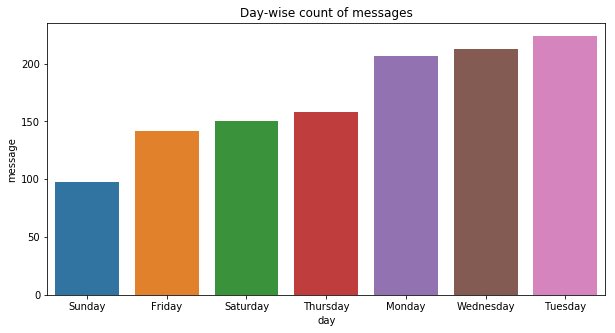

In [63]:
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day_name()
den = df.groupby(['day']).agg({'message':'count'}).sort_values(by='message').reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="day", y="message", data=den).set_title('Day-wise count of messages')
plt.show()


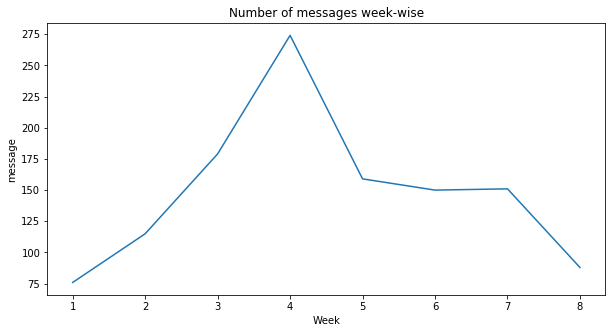

In [70]:
df['Week']=df['date'].dt.week - 19
freq = df.groupby(['Week']).agg({'message':'count'}).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x="Week", y="message", data=freq).set_title('Number of messages week-wise')
plt.show()